<h4>Prediction of collision based on car collision data from Seattle</h4>

<h3>Background/problem</h3>

<p>Background
During 2019, almost 40 thousand people lost their lives to car crashes solely in the U.S. and even though in recent years the mortality rate has been declining, it is still a leading cause of death. The odds of dying in a car crash in the US are of one in 103. 
Being able to identify and predict when car crashes will occur, allows people to avoid certain roads, take extra precautions when driving under certain weather conditions and even alert authorities and manufacturers of trends and risk factors that could translate into policies and design improvements to help save lives. </p>


<p>Motor vehicle road accidents is a leading cause of death, and having enough data accounting for location, vehicle characteristics, road and weather conditions as well as the outcome (severity of car crash) can be used to build a model that predicts the chances of a high severity car crash to occur under certain conditions.
As previously stated, this is particularly relevant for authorities, Emergency response teams and car makers. That could benefit from having this predictive model in place.
</p>

In [420]:
#Exploratory Data Analysis
from typing import Any, Union

import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from pandas.io.parsers import TextFileReader

df=pd.read_csv("D:\\MCC\\DS-projects\\datasets\Data-Collisions.csv",sep=',', error_bad_lines=False, index_col=False)


In [421]:
#COUNT EMPTY VALUES PER COLUMN
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [422]:
df=df.drop(["X","Y","ST_COLCODE","PEDCOUNT","PEDCYLCOUNT","SEVERITYCODE.1","STATUS","COLDETKEY","SEVERITYDESC","ST_COLDESC","HITPARKEDCAR","CROSSWALKKEY","INATTENTIONIND","SPEEDING","SEGLANEKEY","SDOTCOLNUM","PEDROWNOTGRNT","SDOT_COLDESC","SDOT_COLCODE","EXCEPTRSNDESC","OBJECTID","EXCEPTRSNCODE","INTKEY","INCKEY","REPORTNO"],axis=1)
df_complete=df.dropna(subset=["COLLISIONTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND","LOCATION","ADDRTYPE"])
df_complete.describe()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
count,182660.000000,182660.000000,182660.000000
mean,1.309843,2.476902,1.972358
std,0.462430,1.371036,0.563108
min,1.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000
50%,1.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000
max,2.000000,81.000000,12.000000


In [423]:
#prepare timestamp and date related information
Days=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
df_complete['INCDATE'] = pd.to_datetime(df_complete['INCDATE'])
df_complete['timestamp'] = pd.to_datetime(df_complete['INCDTTM'])
df_complete['dayofweek'] = df_complete['timestamp'].dt.dayofweek.astype('int32')
df_complete['Dayname']= df_complete['dayofweek'].apply(lambda x: Days[x])

df_complete['month'] = df_complete['timestamp'].dt.month
df_complete['day'] = df_complete['timestamp'].dt.dayofyear
df_complete['year'] = df_complete['timestamp'].dt.year
df_complete['hour'] = df_complete['timestamp'].dt.hour
df_complete['IsSevere'] = df_complete['SEVERITYCODE'].apply(lambda x: 1 if (x>1)  else 0)
df_complete.head()

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,SEVERITYCODE,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,...,ROADCOND,LIGHTCOND,timestamp,dayofweek,Dayname,month,day,year,hour,IsSevere
0,2,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,2,2013-03-27 00:00:00+00:00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,...,Wet,Daylight,2013-03-27 14:54:00,2,Wed,3,86,2013,14,1
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,2,2006-12-20 00:00:00+00:00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,...,Wet,Dark - Street Lights On,2006-12-20 18:55:00,2,Wed,12,354,2006,18,0
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,3,2004-11-18 00:00:00+00:00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,...,Dry,Daylight,2004-11-18 10:20:00,3,Thu,11,323,2004,10,0
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,3,2013-03-29 00:00:00+00:00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,...,Dry,Daylight,2013-03-29 09:26:00,4,Fri,3,88,2013,9,0
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,2004-01-28 00:00:00+00:00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,...,Wet,Daylight,2004-01-28 08:04:00,2,Wed,1,28,2004,8,1


<h2>Data</h2>
<p>We’ll be using the Seattle GIS collision data, provided by the City of Seattle all data was obtained by SPD and recorded by Traffic Records. This includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.</p>

<p>The data consists of 37 attributes and 194,673 rows (or accidents), with information ranging from Incident ID to Weather and Light conditions. Thus, in order to work with the data we’ve proceeded to clean it up, removing rows with missing data and removing redundant columns. After cleansing the data, we ended up with 182,660 rows. 
</p>

<h3>EDA</h3>
<p>We proceeded to make some sense of the data by trying to identify the seasonality of the severe collisions:</p>

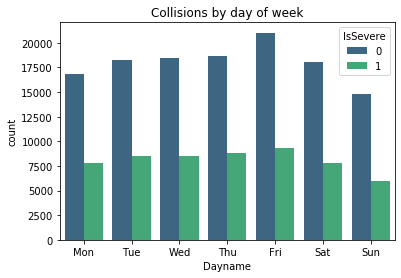

In [334]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df_complete,x="Dayname", hue="IsSevere",palette='viridis',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Collisions by day of week")
plt.show()


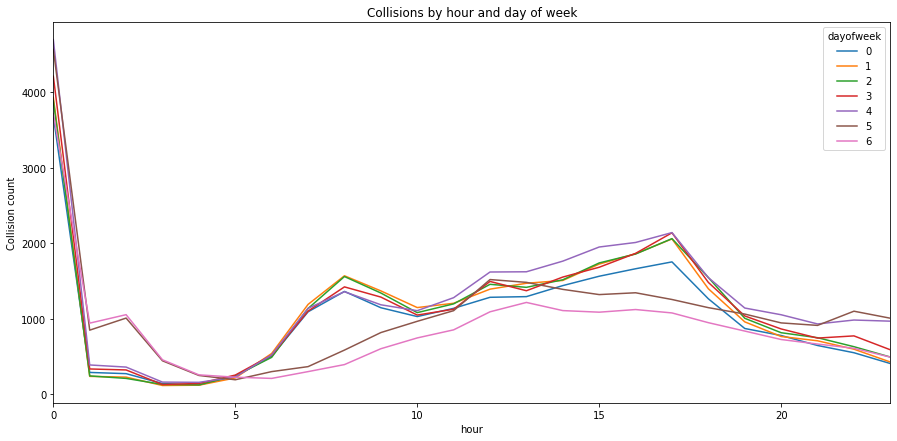

In [183]:
#df_hour=df_complete.groupby(["hour","dayofweek"])["IsSevere"].count().reset_index(name="count")
fig, ax = plt.subplots(figsize=(15,7))
plt.ylabel("Collision count")
plt.title("Collisions by hour and day of week")
df_complete.groupby(["hour","dayofweek"]).count()["IsSevere"].unstack().plot(ax=ax)

<p>Given these two graphs we can identify a common trend, as more collisions are registered during Friday, and less on Sunday.  Same can be said from Hour of day, where most accidents occur during midnight as well as in the afternoon. </p>

<p>In relationship to the weather conditions, we can note that the chances of a Collision increases with a cloudy sky:</p>

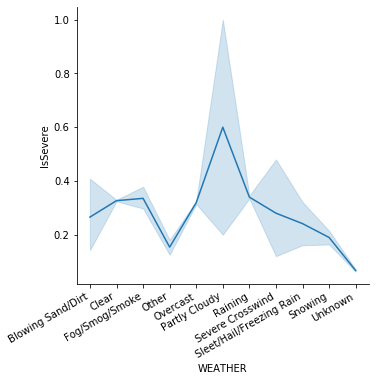

In [329]:

g = sns.relplot(x="WEATHER", y="IsSevere", kind="line", data=df_complete)
g.fig.autofmt_xdate()

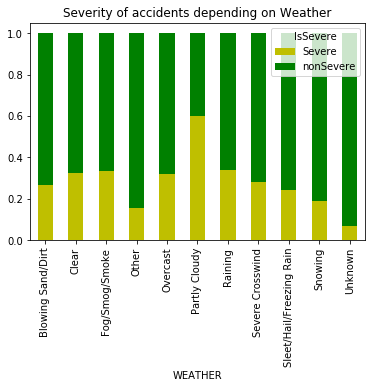

In [409]:
#df_collisions_day=df_complete.groupby("year").count()["IsSevere"]
table_W=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["WEATHER"],columns=["IsSevere"],aggfunc='count')
#table_road["sum"]=table_road["0"]+table_road["1"]
table_W.reset_index(inplace=True)

table_W["Severe"]=table_W[1]/(table_W[1]+table_W[0])
table_W["nonSevere"]=table_W[0]/(table_W[1]+table_W[0])
table_W.drop(0,1, inplace=True)
table_W.drop(1,1, inplace=True)
table_W.reset_index(drop=True,inplace=True)
table_W.reset_index(drop=True,inplace=True)
table_W.set_index("WEATHER",inplace=True)

table_W.plot(kind="bar", stacked=True, color=["y","g"], title="Severity of accidents depending on Weather")



<p>A similar assessment can be made for the condition of the road:</p>

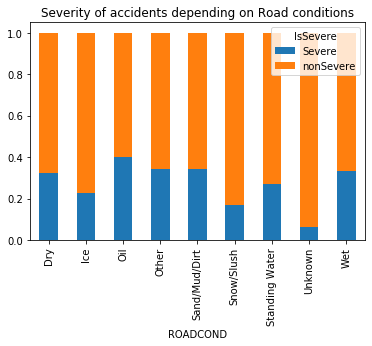

In [410]:
#df_collisions_day=df_complete.groupby("year").count()["IsSevere"]
table_road=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["ROADCOND"],columns=["IsSevere"],aggfunc='count')
#table_road["sum"]=table_road["0"]+table_road["1"]
table_road.reset_index(inplace=True)

table_road["Severe"]=table_road[1]/(table_road[1]+table_road[0])
table_road["nonSevere"]=table_road[0]/(table_road[1]+table_road[0])
table_road.drop(0,1, inplace=True)
table_road.drop(1,1, inplace=True)
table_road.reset_index(drop=True,inplace=True)
table_road.reset_index(drop=True,inplace=True)
table_road
table_road.set_index("ROADCOND",inplace=True)

table_road.plot(kind="bar", stacked=True,title="Severity of accidents depending on Road conditions")



<p>Analyzing the information by Year, we notice that the total number of car accidents has been in decline over the last five years.</p>

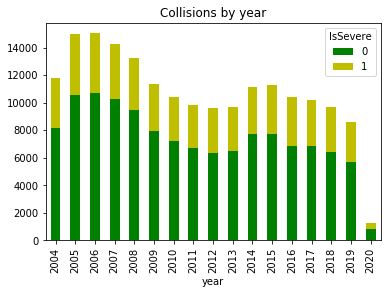

In [229]:
df_collisions_day=df_complete.groupby("year").count()["IsSevere"]
table=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["year"],columns=["IsSevere"],aggfunc='count')
table.plot(kind="bar", stacked=True, color=["g","y"])
#df_collisions_day[["day"]].plot(kind="line")
plt.title("Collisions by year")
plt.show()

<p>Analyzing the information by Year, we notice that the total number of car accidents has been in decline over the last five years.</p>

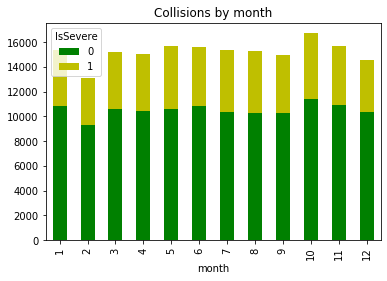

In [415]:
df_collisions_day=df_complete.groupby("month").count()["IsSevere"]
table=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["month"],columns=["IsSevere"],aggfunc='count')
table.plot(kind="bar", stacked=True, color=["g","y"])
#df_collisions_day[["day"]].plot(kind="line")
plt.title("Collisions by month")
plt.show()

<p>Finally, we’ve plotted the correlation matrix in a heatmap for some of the attributes selected as feature variables.</p>

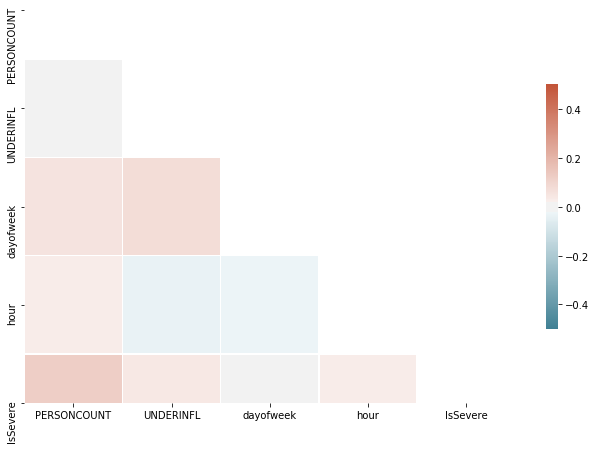

In [414]:
# Compute the correlation matrix
corr = df_features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [404]:
df_features.corr()

,PERSONCOUNT,UNDERINFL,dayofweek,hour,IsSevere
PERSONCOUNT,1.000000,0.018861,0.058407,0.030026,0.124381
UNDERINFL,0.018861,1.000000,0.075877,-0.031520,0.040494
dayofweek,0.058407,0.075877,1.000000,-0.026706,-0.018249
hour,0.030026,-0.031520,-0.026706,1.000000,0.029766
IsSevere,0.124381,0.040494,-0.018249,0.029766,1.000000


In [418]:
df_features.shape

(182660, 10)

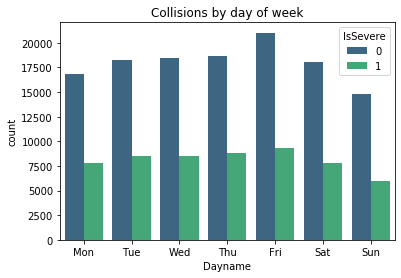

In [332]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df_complete,x="Dayname", hue="IsSevere",palette='viridis',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Collisions by day of week")
plt.show()